# ***EXERCISE 4.10***

## ***PART 1: Task 1:***

In [2]:
# Importing libraries and joined dataframe

# Importing Libraries and the merged_df

# Importing analysis libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

#creating path
path=r'C:\Users\Olufemi\Downloads\CareerFoundry Data Analyics\Instacart Basket Analysis 03_02_2025'

# importing merged dataframe
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'joined_df.pkl'))

In [6]:
df.head(5)

,Unnamed: 0,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,frequency_flag,First Name,Last Name,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income
0,0,2539329,1,1,2,8,0,196,1,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,0,2539329,1,1,2,8,0,14084,2,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,0,2539329,1,1,2,8,0,12427,3,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,0,2539329,1,1,2,8,0,26088,4,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,0,2539329,1,1,2,8,0,26405,5,0,...,Regular customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [8]:
# Dropping the Unnamed: 0 column

df = df.drop(columns=['Unnamed: 0'])

In [10]:
# Save the cleaned DataFrame back to the pickle file 
df.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_joined_df.pkl'))

In [12]:
# Import the cleaned_joined_df to the notebook
df=pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cleaned_joined_df.pkl'))

In [16]:
# Checking the dataframe again to ensure it's cleaned:
df.columns

Index(['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day',
       'days_since_prior_order', 'product_id', 'add_to_cart_order',
       'reordered', 'product_name', 'aisle_id', 'department_id', 'prices',
       'merge_', 'price_range_loc', 'busiest_day', 'busiest_days',
       'busiest_period_of_day', 'max_order', 'loyalty_flag', 'average_spend',
       'spender_flag', 'Customer_frequency', 'frequency_flag', 'First Name',
       'Last Name', 'Gender', 'State', 'Age', 'Date Joined',
       'Number of Dependents', 'Family Status', 'Income'],
      dtype='object')

## ***Crosstabs in Python***

In [19]:
crosstab = pd.crosstab(df['days_since_prior_order'], df['order_number'], dropna = False)

## ***Copying the Crosstabs to view in Excel***

In [22]:
crosstab.to_clipboard()

## ***PART 1: Task 2***
### Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.
### The df.columns function run above shows some PII information included in the following columns: First Name', 'Last Name', 'Gender', 'State', 'Age', 'Date Joined', 'Number of Dependants', 'Family Status' & 'income'.

## ***PART 1: Task 3***
### The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [34]:
df['State'].value_counts()

State
Pennsylvania            667082
California              659783
Rhode Island            656913
Georgia                 656389
New Mexico              654494
Arizona                 653964
North Carolina          651900
Oklahoma                651739
Alaska                  648495
Minnesota               647825
Massachusetts           646358
Wyoming                 644255
Virginia                641421
Missouri                640732
Texas                   640394
Colorado                639280
Maine                   638583
North Dakota            638491
Alabama                 638003
Kansas                  637538
Louisiana               637482
Delaware                637024
South Carolina          636754
Oregon                  636425
Arkansas                636144
Nevada                  636139
New York                635983
Montana                 635265
South Dakota            633772
Illinois                633024
Hawaii                  632901
Washington              632852
Mi

## ***3a. Creating 'Region' Columns***

In [37]:
df.loc[df['State'].isin(['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']),'Region'] = 'Region 1 (Northeast)'

In [39]:
df.loc[df['State'].isin(['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']),'Region'] = 'Region 2  (Midwest)'

In [41]:
df.loc[df['State'].isin(['Delaware', 'Maryland', 'Virginia', 'District of Columbia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']),'Region'] = 'Region 3 (South)'

In [43]:
df.loc[df['State'].isin(['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']),'Region'] = 'Region 4 (West)'

## ***3b. Filtering Region and Spending_flag columns***

In [53]:
grouped = df.groupby(['Region', 'spender_flag']).size().reset_index(name='count')

In [55]:
print(grouped)

                 Region  spender_flag     count
0  Region 1 (Northeast)  High_spender     18642
1  Region 1 (Northeast)   Low_spender   5704094
2   Region 2  (Midwest)  High_spender     29265
3   Region 2  (Midwest)   Low_spender   7568060
4      Region 3 (South)  High_spender     40579
5      Region 3 (South)   Low_spender  10751306
6       Region 4 (West)  High_spender     31223
7       Region 4 (West)   Low_spender   8261690


In [61]:
grouped['Region'] = grouped['Region'].str.strip()

## ***Based on the above results, Region 3 (South) has the largest customer base in this dataset, while Region 1 (Northeast) has the lowest.***

### ***Breakdown:***
    High_spender: 40,579
    Low_spender: 10,751,306
    Total: 10,791,885

## PART 1: Task 4 The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

In [77]:
# Customers with less than 5 orders
df.loc[df['max_order'] < 5, 'Exclusion_flag'] = 'Low-Activity'

In [79]:
# Customers with more than 5 orders
df.loc[df['max_order'] >= 5, 'Exclusion_flag'] = 'Regular-Activity'

In [81]:
# Show the frequency distribution of values in the Exclusion_flag column
df['Exclusion_flag'].value_counts()

Exclusion_flag
Regular-Activity    30964564
Low-Activity         1440295
Name: count, dtype: int64

In [83]:
# Show rows where the value in the Exclusion_flag column is 'Regular-Activity'
df_exclusion =  df[df['Exclusion_flag']== 'Regular-Activity']

In [85]:
df_exclusion['Exclusion_flag'].value_counts()

Exclusion_flag
Regular-Activity    30964564
Name: count, dtype: int64

## Export the dataframe

In [88]:
df_exclusion.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'df_exclusion_4.10.pkl'))

## PART 1: Task 5 The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles.

In [95]:
# Define a list of boolean conditions that segment customers in the df DataFrame based on age, number of dependents, and income.

conditions = [
    (df['Age'] < 30) & (df['Number of Dependents'] == 0),  # Single Adult
    (df['Age'].between(25, 40)) & (df['Number of Dependents'] > 0),  # Young Parent
    (df['Age'] > 30) & (df['Number of Dependents'] >= 2),  # Established Family
    (df['Age'] > 50) & (df['Number of Dependents'] == 0),  # Senior Shopper
    (df['Income'] < 40000)  # Budget-Conscious Shopper
]

In [97]:
# Define a list of category labels called choices for segmenting customers based on demographics conditions defined above
choices = [
    "Single Adult",
    "Young Parent",
    "Established Family",
    "Senior Shopper",
    "Budget-Conscious Shopper"
]

In [99]:
# Create customer profiles based on defined demographic conditions
df['profile'] = np.select(conditions, choices, default="High Budget Shopper")

In [101]:
df.head()

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,Gender,State,Age,Date Joined,Number of Dependents,Family Status,Income,Region,Exclusion_flag,profile
0,2539329,1,1,2,8,0,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),Regular-Activity,Young Parent
1,2539329,1,1,2,8,0,14084,2,0,Organic Unsweetened Vanilla Almond Milk,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),Regular-Activity,Young Parent
2,2539329,1,1,2,8,0,12427,3,0,Original Beef Jerky,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),Regular-Activity,Young Parent
3,2539329,1,1,2,8,0,26088,4,0,Aged White Cheddar Popcorn,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),Regular-Activity,Young Parent
4,2539329,1,1,2,8,0,26405,5,0,XL Pick-A-Size Paper Towel Rolls,...,Female,Alabama,31,2/17/2019,3,married,40423,Region 3 (South),Regular-Activity,Young Parent


## Filtering Profile and Spending_flag Columns

In [112]:
# Group df dataframe by the columns 'profile' and 'spender_flag', and counts how many rows fall into each combination of those two categories.
Profile_List = df.groupby(['profile', 'spender_flag']).size().reset_index(name='count')

In [114]:
print(Profile_List)

                     profile  spender_flag     count
0   Budget-Conscious Shopper   Low_spender    560711
1         Established Family  High_spender     39463
2         Established Family   Low_spender  10339239
3        High Budget Shopper  High_spender     38222
4        High Budget Shopper   Low_spender   9922293
5             Senior Shopper  High_spender     15748
6             Senior Shopper   Low_spender   3921937
7               Single Adult  High_spender      5362
8               Single Adult   Low_spender   1507868
9               Young Parent  High_spender     20914
10              Young Parent   Low_spender   6033102


## PART 1: Task 6 Create an appropriate visualization to show the distribution of profiles.

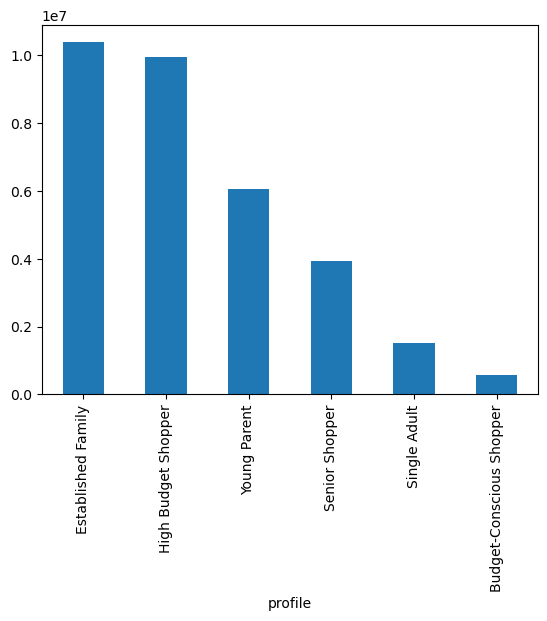

In [117]:
# Create a Bar Chart
Profile_bar = df['profile'].value_counts().plot.bar()

## Export the Bar Chart

In [120]:
Profile_bar.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Profile_bar.png'))

## PART 1: Task 7 Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [123]:
# Calculate summary statistics for each customer profile group in the df DataFrame
profile_stats = df.groupby("profile").agg({
    "days_since_prior_order": ["max", "mean", "min"],
    "prices": ["max", "mean", "min"]
})

In [125]:
print(profile_stats)

                         days_since_prior_order                prices  \
                                            max       mean min    max   
profile                                                                 
Budget-Conscious Shopper                     30  10.812007   0   25.0   
Established Family                           30  10.415358   0   25.0   
High Budget Shopper                          30  10.360389   0   25.0   
Senior Shopper                               30  10.293618   0   25.0   
Single Adult                                 30  10.477279   0   25.0   
Young Parent                                 30  10.411326   0   25.0   

                                         
                              mean  min  
profile                                  
Budget-Conscious Shopper  6.487099  1.0  
Established Family        7.792617  1.0  
High Budget Shopper       7.867797  1.0  
Senior Shopper            7.792922  1.0  
Single Adult              7.772597  1.0  
Young 

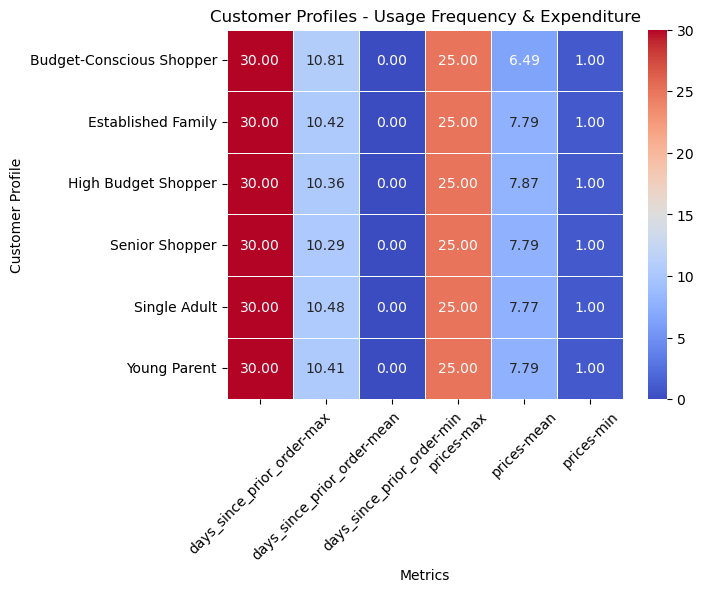

In [129]:
heatmap_profile = sns.heatmap(profile_stats, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Improve design
plt.title("Customer Profiles - Usage Frequency & Expenditure")
plt.xlabel("Metrics")
plt.ylabel("Customer Profile")
plt.xticks(rotation=45)

# Show plot
plt.show()


### Export Heatmap Profile

In [132]:
heatmap_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'heatmap_profile.png'))

## PART 1: Task 8 Comparing customer profiles with regions and departments. Identifying a link between them. This information could demonstrate customers' different behaviors across regions.

In [135]:
region_profile_stats = df.groupby(["Region", "profile"]).size().unstack()

In [137]:
print(region_profile_stats)

profile               Budget-Conscious Shopper  Established Family  \
Region                                                               
Region 1 (Northeast)                    101147             1847310   
Region 2  (Midwest)                     129865             2414824   
Region 3 (South)                        193152             3450985   
Region 4 (West)                         136547             2665583   

profile               High Budget Shopper  Senior Shopper  Single Adult  \
Region                                                                    
Region 1 (Northeast)              1741553          696733        276268   
Region 2  (Midwest)               2375693          928759        345299   
Region 3 (South)                  3297120         1292499        515421   
Region 4 (West)                   2546149         1019694        376242   

profile               Young Parent  
Region                              
Region 1 (Northeast)       1059725  
Region 2  (Midwes

### Heatmap visualization of the region_profile_stats

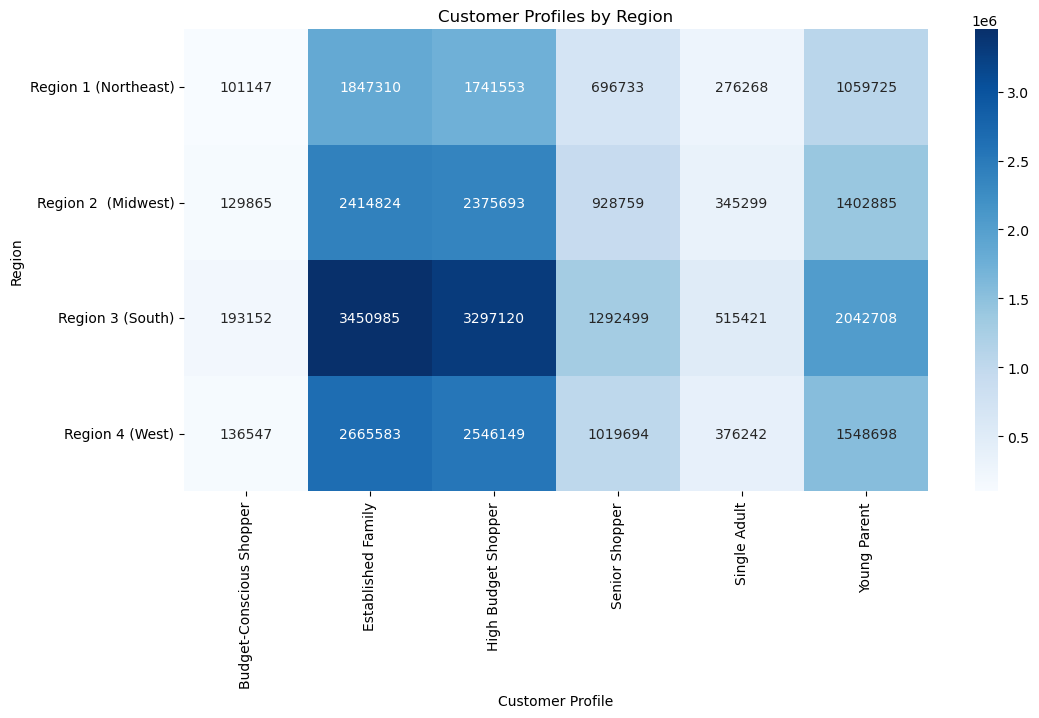

In [145]:
# Show the distribution of customer profiles across four regions based on the number of customers in each segment

plt.figure(figsize=(12,6))
Heat_map_regions = sns.heatmap(region_profile_stats, cmap="Blues", annot=True, fmt="d")
plt.title("Customer Profiles by Region")
plt.xlabel("Customer Profile")
plt.ylabel("Region")
plt.show()

## ***Insight:***

### ***"Established Family"*** and ***"High Budget Shopper"*** are the most common profiles across all regions, especially in ***Region 3 (South),*** which has the highest overall customer volume. In contrast, ***"Budget-Conscious Shopper"*** is the least represented, while other profiles like ***"Senior Shopper", "Single Adult", and "Young Parent"*** appear in moderate numbers.

## ***Business Recommendations:***

### Marketing and sales strategies should focus on Established Families and High Budget Shoppers, especially in Region 3 (South).
### There may be opportunities to grow underrepresented segments like Budget-Conscious Shoppers or Single Adults, depending on business goals.

### Export Heatmap Regions

In [143]:
Heat_map_regions.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Heat_map_regions.png'))